In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1">Data Loading</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2">EDA</a></span><ul class="toc-item"><li><span><a href="#Netflix-Price-Dataset" data-toc-modified-id="Netflix-Price-Dataset-2.1">Netflix Price Dataset</a></span></li><li><span><a href="#IMDB-Dataset" data-toc-modified-id="IMDB-Dataset-2.2">IMDB Dataset</a></span></li></ul></li></ul></div>

## Data Loading

In [29]:
movie = pd.read_csv('IMDb-movies-csv.csv')
#titles = pd.read_csv('netflix_titles-csv.csv')
titles = pd.read_csv("movie_titles.csv",header=None)

/Users/lingyizhao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## EDA

### Netflix Price Dataset

In [30]:
titles.head(5)

0     1                             2
0  1  2003               Dinosaur Planet
1  2  2004    Isle of Man TT 2004 Review
2  3  1997                     Character
3  4  1994  Paula Abdul's Get Up & Dance
4  5  2004      The Rise and Fall of ECW

In [31]:
titles.columns = ['index','year','title']

In [32]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17763 entries, 0 to 17762
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   17763 non-null  int64 
 1   year    17763 non-null  int64 
 2   title   17763 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.4+ KB


In [33]:
#titles = titles[titles.year != 'NULL']

In [34]:

titles['year'] = pd.to_numeric(titles['year'])/10
titles['year'] = titles['year'].astype(str)
titles['year'] = titles['year'].str.replace('.', '')
#titles['year'] = titles['year'].str.replace('nan', ' ')
titles.head(10)


index  year                         title
0      1  2003               Dinosaur Planet
1      2  2004    Isle of Man TT 2004 Review
2      3  1997                     Character
3      4  1994  Paula Abdul's Get Up & Dance
4      5  2004      The Rise and Fall of ECW
5      6  1997                          Sick
6      7  1992                         8 Man
7      8  2004    What the #$*! Do We Know!?
8      9  1991      Class of Nuke 'Em High 2
9     10  2001                       Fighter

In [35]:

#titles.dropna(inplace = True)

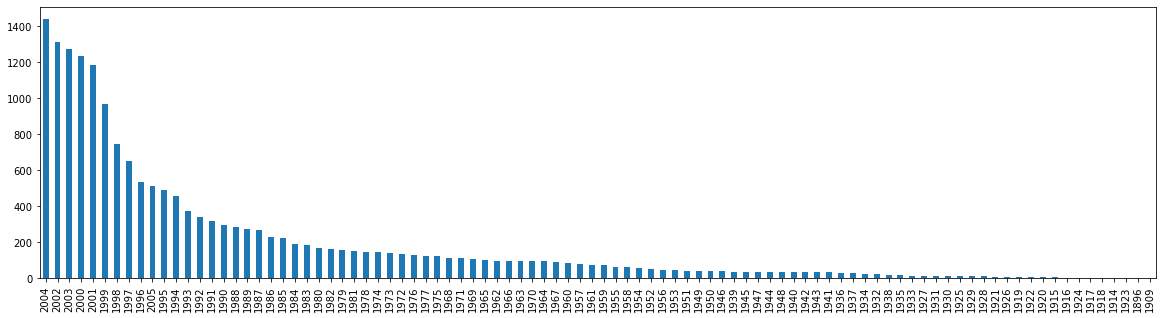

In [36]:
titles['year'].value_counts().plot(kind='bar', figsize=(20,5))

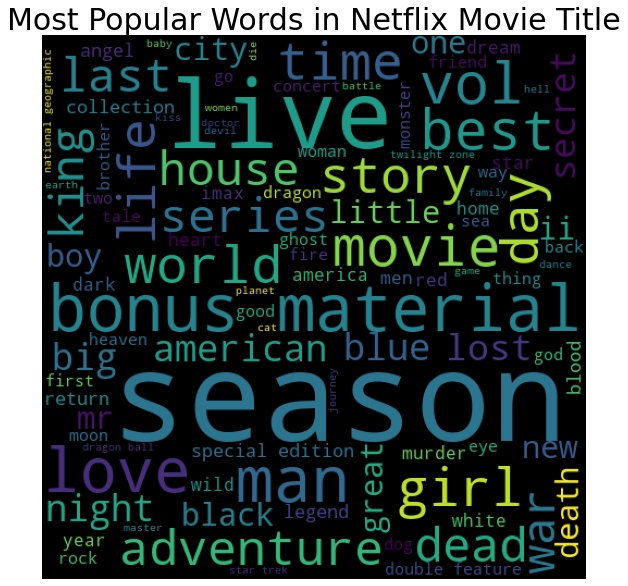

In [37]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'black', width = 500,  height = 500, 
                      max_words = 100).generate(' '.join(titles['title'].str.lower()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Netflix Movie Title',fontsize = 30)
plt.show()

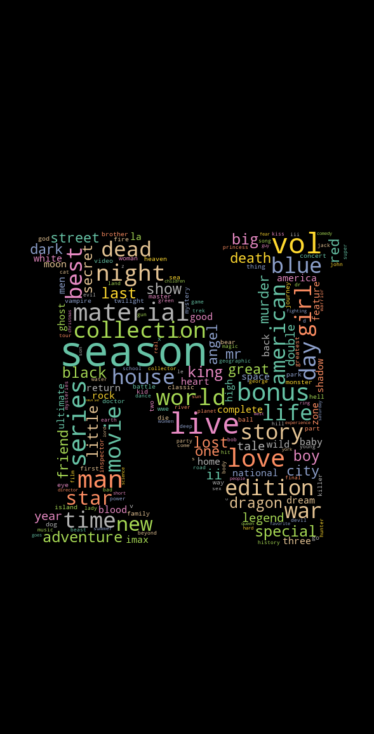

In [38]:
mask = np.array(Image.open("/Users/lingyizhao/Desktop/MSCA31008 Data Mining/Final Project/N.png"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(' '.join(titles['title'].str.lower()))
plt.figure(figsize=(10,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
wordcloud.to_file("Netflix-wordcloud.jpg")

In [39]:
import plotly.express as px
fig = px.line(titles.groupby('year').size())
fig.update_layout(title={'text': f"Netflix Total Number of Movies Per Year", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, showlegend=False)
fig.show()

### IMDB Dataset

In [40]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [41]:
movie= movie[movie.year != 'TV Movie 2019']

In [42]:
movie['year'] = movie['year'].astype(int) 

In [43]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85854 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85854 non-null  object 
 1   title                  85854 non-null  object 
 2   original_title         85854 non-null  object 
 3   year                   85854 non-null  int64  
 4   date_published         85854 non-null  object 
 5   genre                  85854 non-null  object 
 6   duration               85854 non-null  int64  
 7   country                85790 non-null  object 
 8   language               85021 non-null  object 
 9   director               85767 non-null  object 
 10  writer                 84282 non-null  object 
 11  production_company     81399 non-null  object 
 12  actors                 85785 non-null  object 
 13  description            83739 non-null  object 
 14  avg_vote               85854 non-null  float64
 15  vo

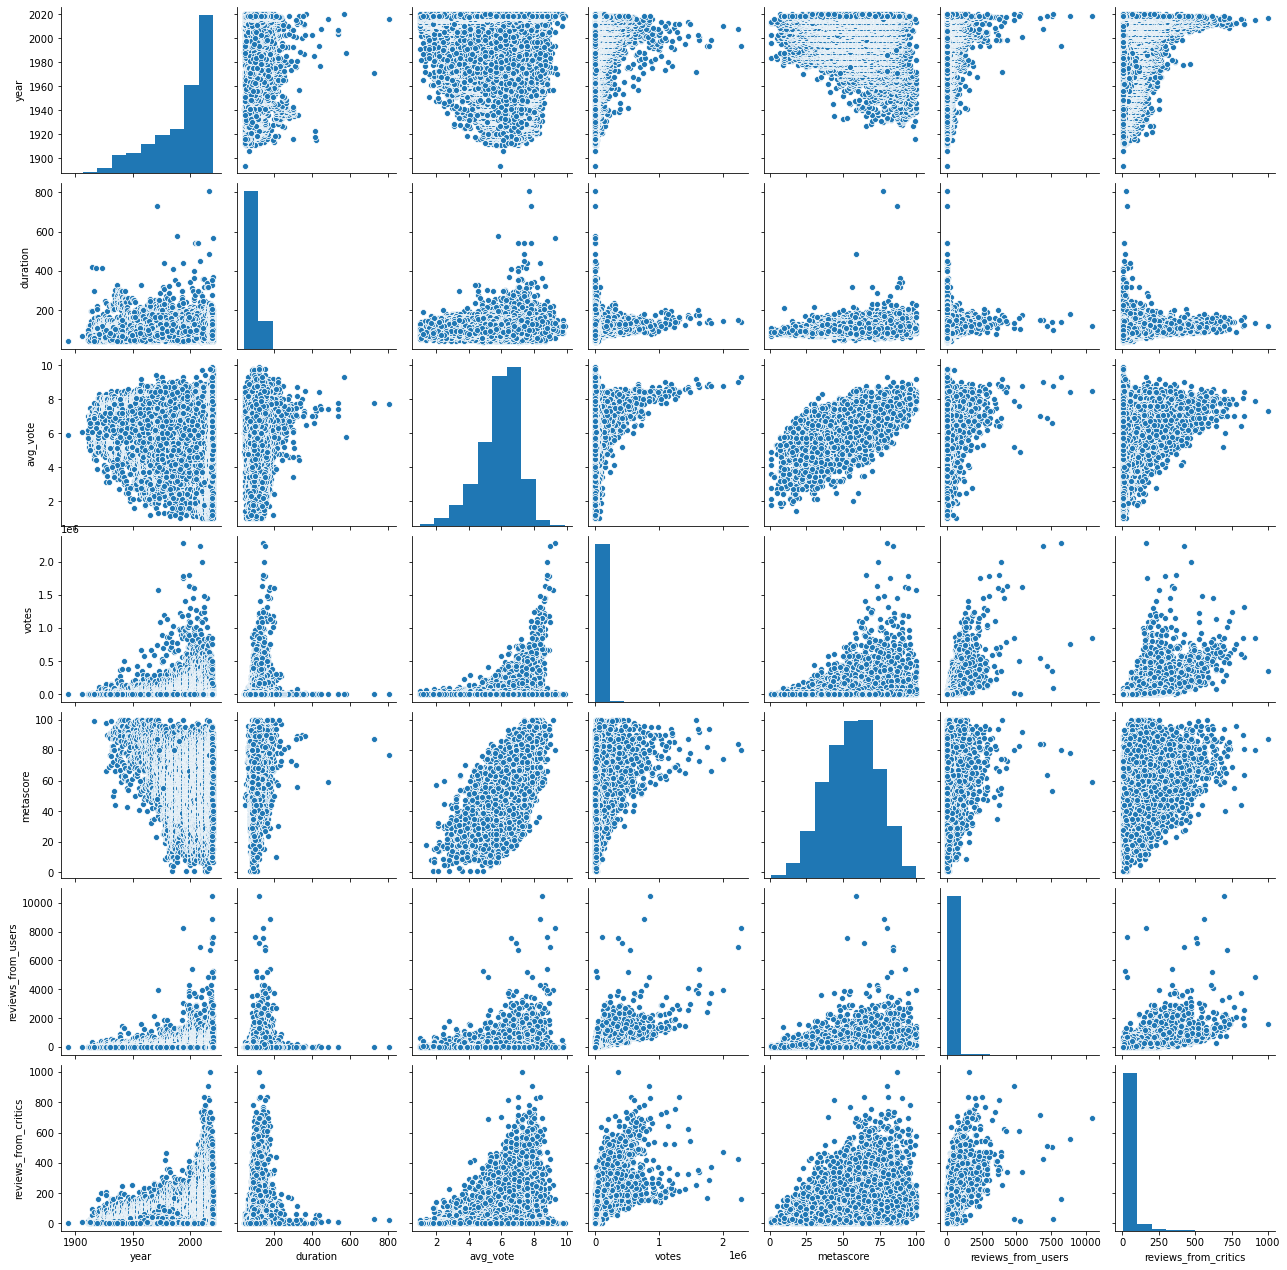

In [44]:
sns.pairplot(movie)
plt.show()

In [45]:
import plotly.express as px
fig = px.line(movie.groupby('year').size())
fig.update_layout(title={'text': f"IMDB Total Number of Movies Per Year", 'x': 0.5,
                             'xanchor': 'center', 'font': {'size': 20}}, showlegend=False)
fig.show()

Text(0.5, 1.0, 'Duration vs year')

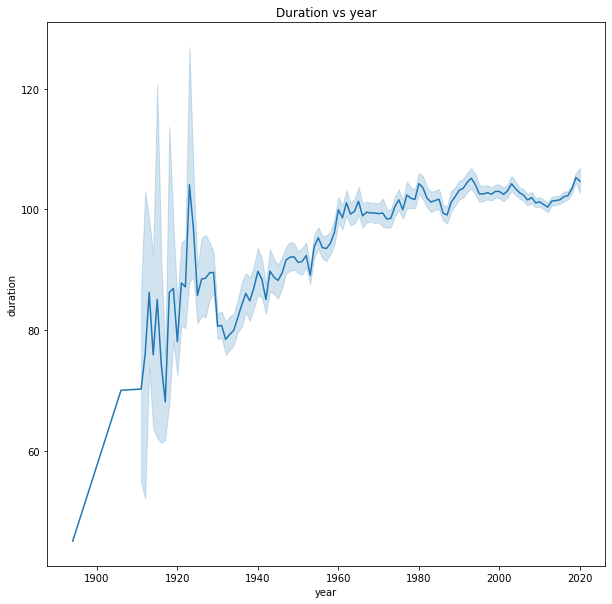

In [46]:
ax=sns.lineplot(data=movie, x="year", y="duration")
ax.set_title("Duration vs year")

Text(0.5, 1.0, 'Avg_vote vs year')

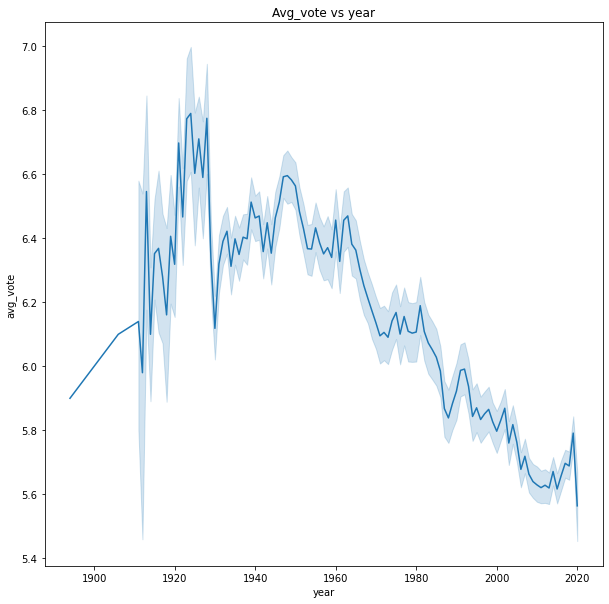

In [47]:
ax=sns.lineplot(data=movie, x="year", y="avg_vote")
ax.set_title("Avg_vote vs year")

(array([  304.,  1319.,  3476.,  6984., 13839., 24960., 26340.,  7699.,
          897.,    36.]),
 array([1.  , 1.89, 2.78, 3.67, 4.56, 5.45, 6.34, 7.23, 8.12, 9.01, 9.9 ]),
 <a list of 10 Patch objects>)

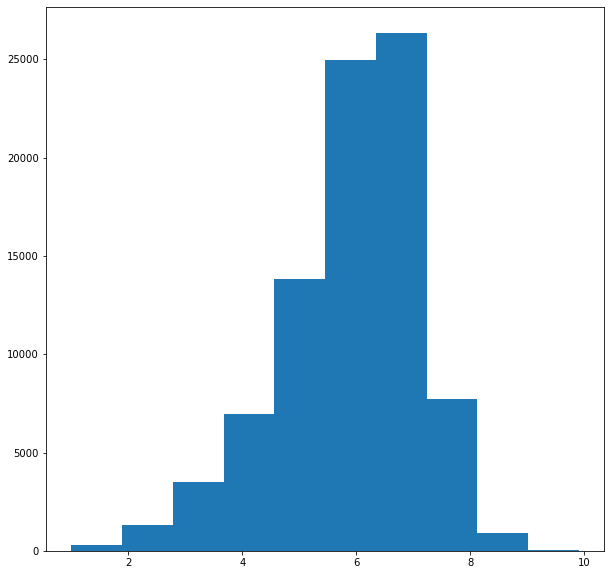

In [48]:
plt.hist(movie.avg_vote)

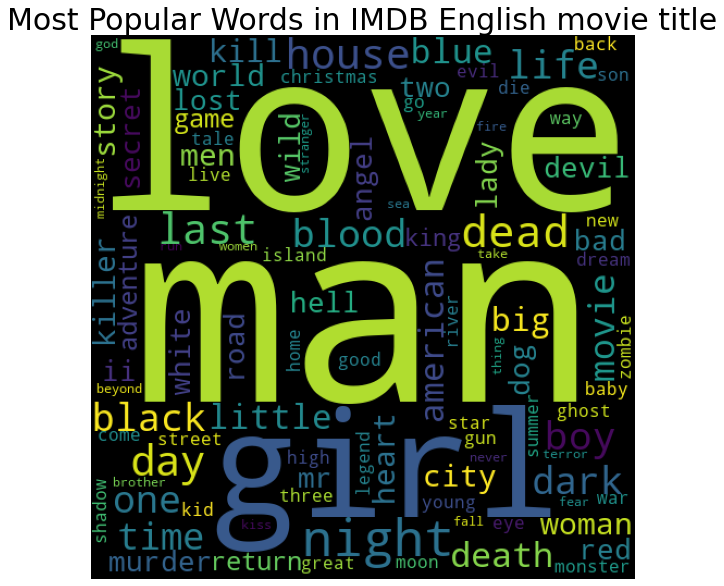

In [50]:
IMDB_movie = movie[movie["language"] == "English"]

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color = 'black', width = 500,  height = 500, 
                      max_words = 100).generate(' '.join(IMDB_movie['original_title'].str.lower()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in IMDB English movie title',fontsize = 30)
plt.show()

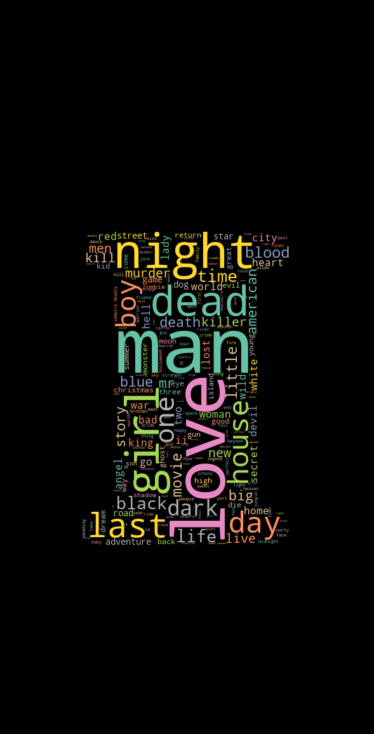

In [51]:
mask = np.array(Image.open("/Users/lingyizhao/Desktop/MSCA31008 Data Mining/Final Project/i.png"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(' '.join(IMDB_movie['original_title'].str.lower()))
plt.figure(figsize=(10,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
wordcloud.to_file("IMDB-wordcloud.jpg")

In [22]:
genres_df = movie[['genre','title']].groupby(['genre']).count().reset_index().rename(columns={'title':'number_of_movies'})
genres_df = genres_df.sort_values(by='number_of_movies', ascending=False)
genres_top10_df = genres_df.iloc[:10]
config = {'responsive': False}
import plotly.express as px
genres_bar = px.bar(genres_top10_df, 
                    x = 'genre', 
                    y = 'number_of_movies', 
                    title = 'Top 10 Genres in terms of number of movies',
                    text = 'number_of_movies', 
                    labels = dict(genre = 'Genre', number_of_movies = 'Number of movies'),
                    color = 'genre')
                    
genres_bar.show()

In [23]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (15, 10))
# ax  = fig.gca()
# movie.hist(ax = ax)
# pass

In [24]:
# corrMatrix = movie.corr()
# plt.figure(figsize = (16,12))
# sns.heatmap(corrMatrix, annot=True)